# Exercises for interview preparation

In [191]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

In [192]:
## SVM from Python DS Handbook
from sklearn.datasets.samples_generator import make_blobs

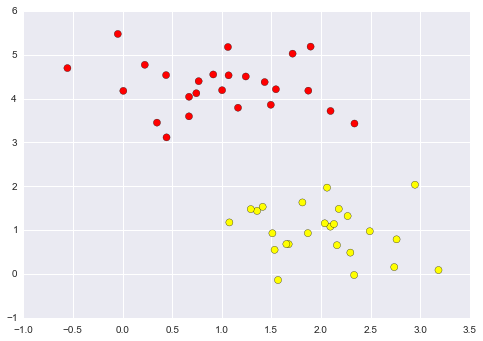

In [193]:
X,y = make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.60)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')

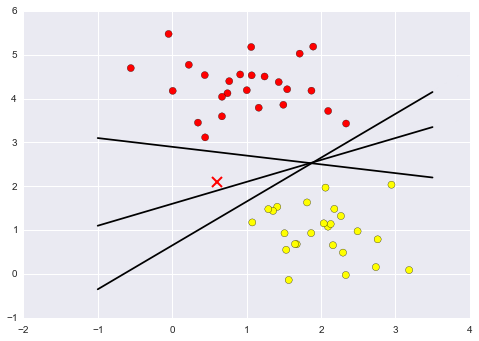

In [194]:
xfit = np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plt.plot([0.6],[2.1],'x',color='red',markeredgewidth=2,markersize=10)
for m,b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit,m*xfit+b,'-k')

In [195]:
from sklearn.svm import SVC

In [196]:
model = SVC(kernel='linear',C=1E10)

In [197]:
model.fit(X,y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

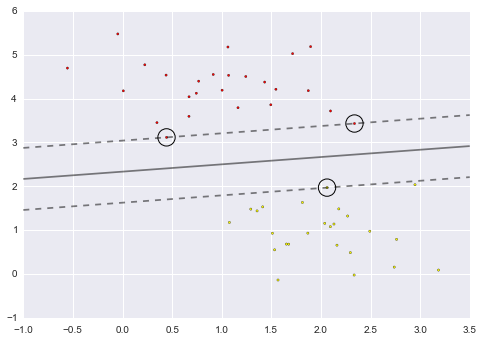

In [198]:
def plot_svc_function(model,ax=None,plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary & margins
    ax.contour(X, Y, P, colors='k',
        levels=[-1, 0, 1], alpha=0.5,
        linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], 
                   model.support_vectors_[:, 1], 
                   s=300, linewidth=1, facecolors='none');
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:, 0], X[:, 1], c=y, s=5,cmap='autumn')
plot_svc_function(model)    

In [199]:
model.support_vectors_

array([[ 0.44359863,  3.11530945],
       [ 2.33812285,  3.43116792],
       [ 2.06156753,  1.96918596]])

In [200]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_function(model, ax)

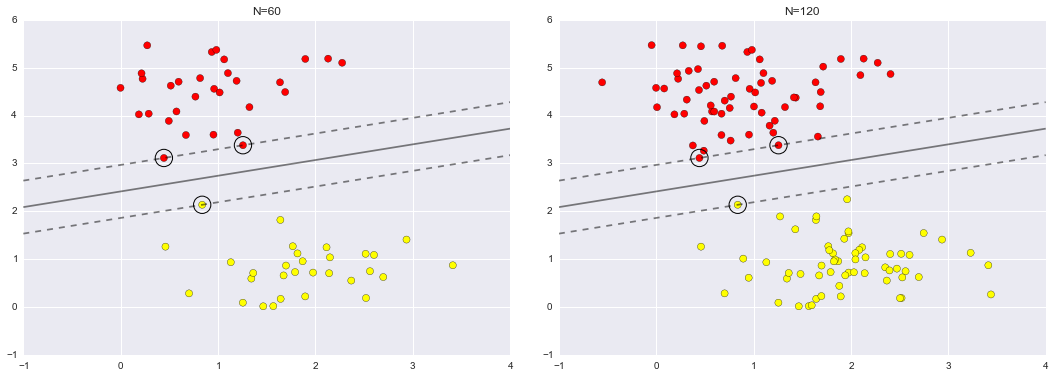

In [201]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N,axi)
    axi.set_title('N={0}'.format(N))

In [202]:
from ipywidgets import interact,fixed

<function __main__.plot_svm>

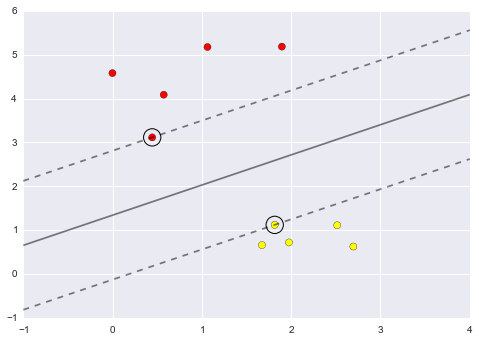

In [203]:
interact(plot_svm,N=[10,200],ax=fixed(None))

In [204]:
## using kernel trick
from sklearn.datasets.samples_generator import make_circles

In [205]:
X,y = make_circles(100,factor=0.1,noise=0.1)

In [206]:
clf = SVC(kernel='linear').fit(X,y)

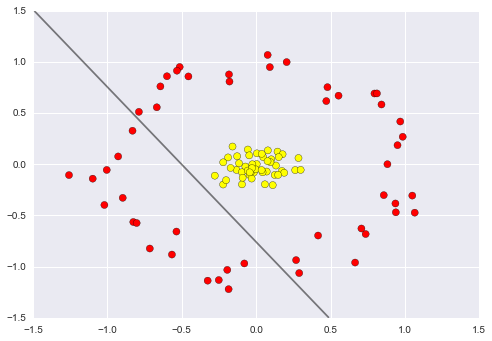

In [207]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_function(clf, plot_support=False)

In [208]:
r = np.exp(-(X**2).sum(1))

In [209]:
from mpl_toolkits import mplot3d

In [210]:
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

<function __main__.plot_3D>

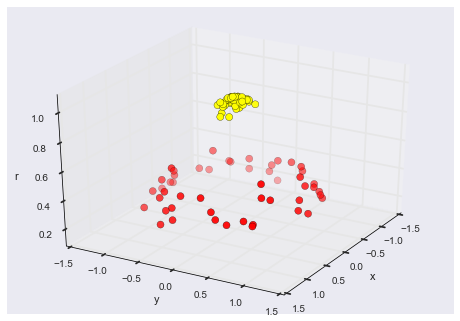

In [211]:
interact(plot_3D,elev=[-90,90],azip=(-180,180),X=fixed(X),y=fixed(y))

In [212]:
clf = SVC(kernel='rbf',C=1E6)
clf.fit(X,y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

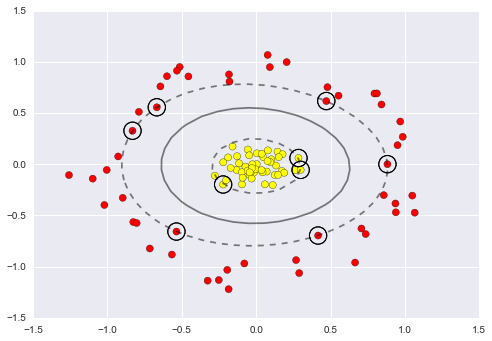

In [213]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none')

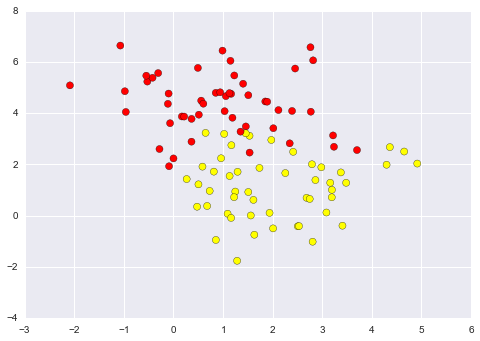

In [214]:
X, y = make_blobs(n_samples=100, centers=2,random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

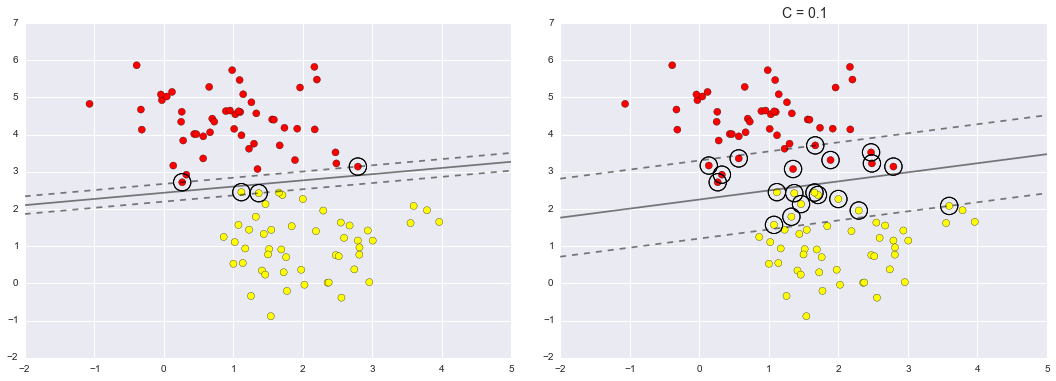

In [215]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
## Vary margin softness
for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, lw=1, facecolors='none');

axi.set_title('C = {0:.1f}'.format(C), size=14)

In [216]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [217]:
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

In [218]:
## Use PCA in a pipeline to extract features
from sklearn.svm import SVC
from sklearn.decomposition import RandomizedPCA
from sklearn.pipeline import make_pipeline

In [219]:
pca = RandomizedPCA(n_components=150,whiten=True,random_state=42)
svc = SVC(kernel='rbf',class_weight='auto')
model = make_pipeline(pca,svc)

In [220]:
from sklearn.cross_validation import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(faces.data, faces.target, random_state=42)

In [221]:
from sklearn.grid_search import GridSearchCV

In [222]:
param_grid = {'svc__C':[1,5,10,50], 'svc__gamma':[0.0001,0.0005,0.001,0.005]}
grid = GridSearchCV(model,param_grid)
%time grid.fit(Xtrain,ytrain)
print(grid.best_params_)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto'

CPU times: user 2min 16s, sys: 3.03 s, total: 2min 19s
Wall time: 2min 19s
{'svc__gamma': 0.001, 'svc__C': 5}


/usr/local/lib/python2.7/dist-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)


In [223]:
model = grid.best_estimator_

In [224]:
yfit = model.predict(Xtest)

In [225]:
model

Pipeline(steps=[('randomizedpca', RandomizedPCA(copy=True, iterated_power=3, n_components=150, random_state=42,
       whiten=True)), ('svc', SVC(C=5, cache_size=200, class_weight='auto', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

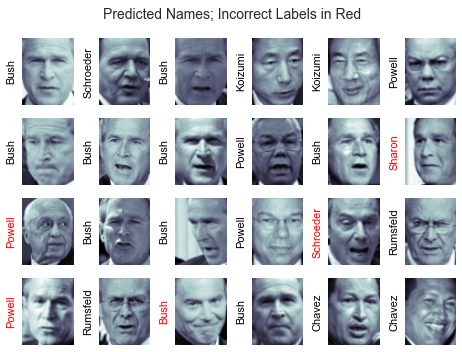

In [226]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1], color='black' if yfit[i] == ytest[i] else 'red')

fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [227]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.80      0.80      0.80        15
     Colin Powell       0.78      0.88      0.83        68
  Donald Rumsfeld       0.68      0.74      0.71        31
    George W Bush       0.87      0.83      0.85       126
Gerhard Schroeder       0.56      0.61      0.58        23
      Hugo Chavez       0.80      0.80      0.80        20
Junichiro Koizumi       1.00      0.92      0.96        12
       Tony Blair       0.81      0.69      0.74        42

      avg / total       0.80      0.80      0.80       337



/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2645: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


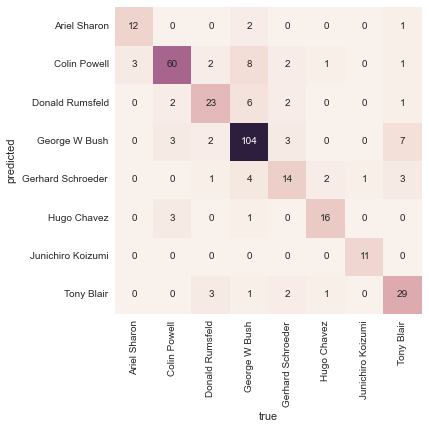

In [228]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true')
plt.ylabel('predicted')

In [229]:
## Decision Trees and Random Forests from Python DS Handbook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [230]:
from sklearn.datasets import make_blobs

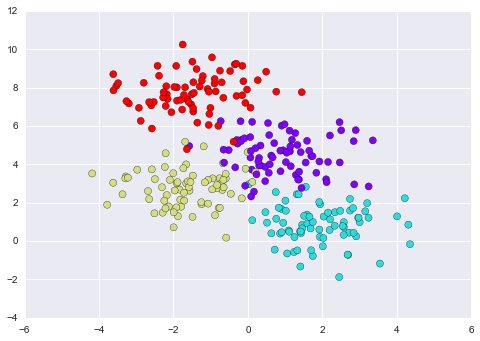

In [231]:
X,y = make_blobs(n_samples=300,centers=4,random_state=0,cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

In [232]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X,y)

In [233]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()

    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
    clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
    np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
    levels=np.arange(n_classes + 1) - 0.5,cmap=cmap, clim=(y.min(), y.max()),zorder=1)
    ax.set(xlim=xlim, ylim=ylim)

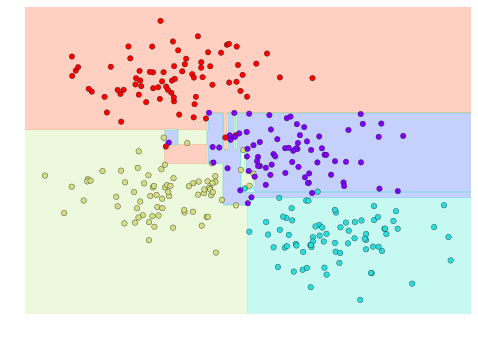

In [234]:
visualize_classifier(DecisionTreeClassifier(),X,y)

In [235]:
%%file helpers_07_08.py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from Ipython.html.widgets import interact

def visualize_tree(estimator, X, y, boundaries=True, xlim=None, ylim=None, ax=None):
    ax = ax or plt.gca()
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='rainbow',clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    if xlim is None:
        xlim = ax.get_xlim()
    if ylim is None:
        ylim = ax.get_ylim()
    
    # fit the estimator
    estimator.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
    np.linspace(*ylim, num=200))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    n_classes = len(np.unique(y))
    Z = Z.reshape(xx.shape)
    contours = ax.contourf(xx, yy, Z, alpha=0.3,levels=np.arange(n_classes + 1) - 0.5, 
                           cmap='rainbow', clim=(y.min(), y.max()), zorder=1)
    ax.set(xlim=xlim, ylim=ylim)
    
# Plot the decision boundaries
def plot_boundaries(i, xlim, ylim):
    if i >= 0:
        tree = estimator.tree_
    if tree.feature[i] == 0:
        ax.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k', zorder=2)
        plot_boundaries(tree.children_left[i],
                        [xlim[0], tree.threshold[i]], ylim)
        plot_boundaries(tree.children_right[i],
                        [tree.threshold[i], xlim[1]], ylim)
    elif tree.feature[i] == 1:
        ax.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k', zorder=2)
        plot_boundaries(tree.children_left[i], xlim,
                        [ylim[0], tree.threshold[i]])
        plot_boundaries(tree.children_right[i], xlim,
                        [tree.threshold[i], ylim[1]])
    if boundaries:
        plot_boundaries(0, xlim, ylim)

def plot_tree_interactive(X, y):
    def interactive_tree(depth=5):
        clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
        visualize_tree(clf, X, y)
        
    return interact(interactive_tree, depth=[1, 5])

def randomized_tree_interactive(X, y):
    N = int(0.75 * X.shape[0])
    xlim = (X[:, 0].min(), X[:, 0].max())
    ylim = (X[:, 1].min(), X[:, 1].max())

    def fit_randomized_tree(random_state=0):
        clf = DecisionTreeClassifier(max_depth=15)
        i = np.arange(len(y))
        rng = np.random.RandomState(random_state)
        rng.shuffle(i)
        visualize_tree(clf, X[i[:N]], y[i[:N]], boundaries=False,xlim=xlim, ylim=ylim)
        interact(fit_randomized_tree, random_state=[0, 100])

Overwriting helpers_07_08.py


In [237]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [238]:
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100,max_samples=0.8,random_state=1)

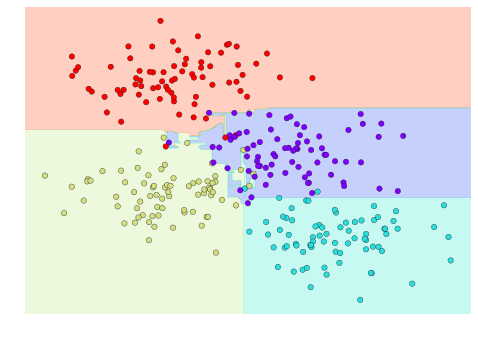

In [239]:
bag.fit(X,y)
visualize_classifier(bag,X,y)

In [240]:
from sklearn.ensemble import RandomForestClassifier

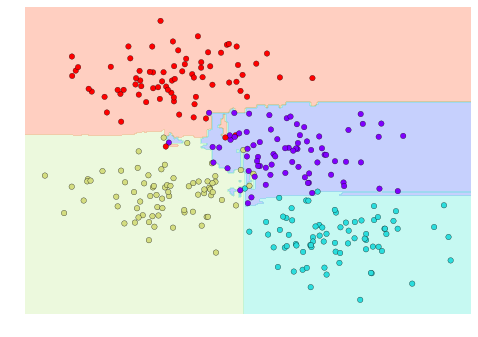

In [241]:
model = RandomForestClassifier(n_estimators=100,random_state=0)
visualize_classifier(model,X,y)

In [242]:
rng = np.random.RandomState(42)
x = 10*rng.rand(200)

In [243]:
def model(x,sigma=0.3):
    fast_oscillation = np.sin(5*x)
    slow_oscillation = np.sin(0.5*x)
    noise = sigma*rng.randn(len(x))
    
    return slow_oscillation+fast_oscillation+noise

<Container object of 3 artists>

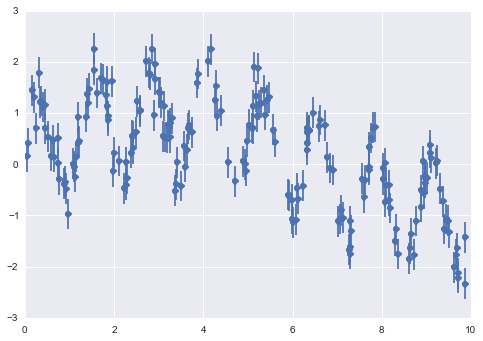

In [244]:
y = model(x)
plt.errorbar(x,y,0.3,fmt='o')

In [245]:
from sklearn.ensemble import RandomForestRegressor

In [246]:
forest = RandomForestRegressor(200)
forest.fit(x[:,None],y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [247]:
xfit = np.linspace(0,10,1000)
yfit = forest.predict(xfit[:,None])
ytrue = model(xfit,sigma=0)

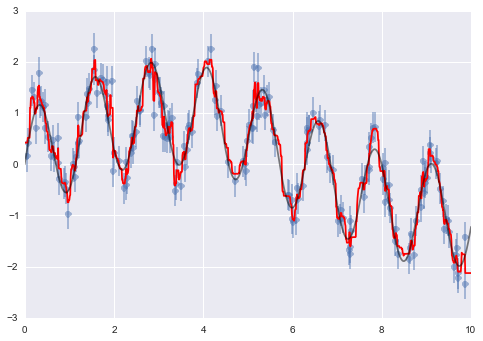

In [248]:
plt.errorbar(x,y,0.3,fmt='o',alpha=0.5)
plt.plot(xfit,yfit,'-r')
plt.plot(xfit,ytrue,'-k',alpha=0.5)

In [249]:
from sklearn.datasets import load_digits

In [250]:
digits = load_digits()
digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

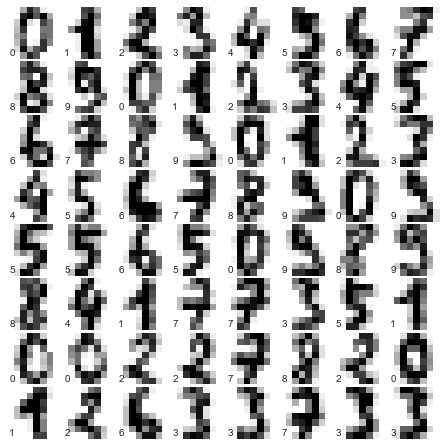

In [251]:
# set up fig
fig = plt.figure(figsize=(6, 6)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in xrange(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [252]:
from sklearn.cross_validation import train_test_split

In [253]:
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data,digits.target,random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain,ytrain)
ypred = model.predict(Xtest)

In [254]:
from sklearn import metrics
print (metrics.classification_report(ypred,ytest))

             precision    recall  f1-score   support

          0       1.00      0.97      0.99        38
          1       1.00      0.93      0.97        46
          2       0.95      1.00      0.98        42
          3       0.98      1.00      0.99        44
          4       0.97      1.00      0.99        37
          5       0.98      0.98      0.98        48
          6       0.98      1.00      0.99        51
          7       1.00      0.96      0.98        50
          8       0.96      0.98      0.97        47
          9       0.98      0.98      0.98        47

avg / total       0.98      0.98      0.98       450



In [255]:
from sklearn.metrics import confusion_matrix

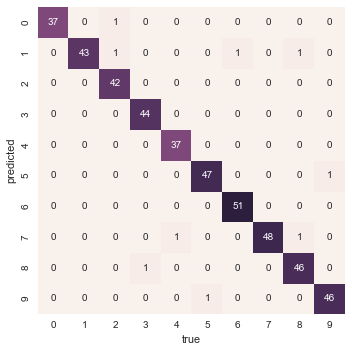

In [256]:
mat = confusion_matrix(ytest,ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true')
plt.ylabel('predicted')

In [257]:
## Adaptive boosting (Ch7 in Python for ML)
from sklearn.ensemble import AdaBoostClassifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [258]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)

In [259]:
df_wine.columns = ['Class label', 'Alcohol',

'Malic acid', 'Ash',

'Alcalinity of ash',

'Magnesium', 'Total phenols',

'Flavanoids', 'Nonflavanoid phenols',

'Proanthocyanins',

'Color intensity', 'Hue',

'OD280/OD315 of diluted wines',

'Proline']

In [260]:
df_wine.head(10)

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [261]:
## Consider only wine class 2 and 3 (ie ignore 1) and select two features
df_wine = df_wine[df_wine['Class label']!=1]

In [262]:
df_wine.head(10)

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
59,2,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520
60,2,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680
61,2,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450
62,2,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630
63,2,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420
64,2,12.17,1.45,2.53,19.0,104,1.89,1.75,0.45,1.03,2.95,1.45,2.23,355
65,2,12.37,1.21,2.56,18.1,98,2.42,2.65,0.37,2.08,4.60,1.19,2.30,678
66,2,13.11,1.01,1.70,15.0,78,2.98,3.18,0.26,2.28,5.30,1.12,3.18,502
67,2,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510
68,2,13.34,0.94,2.36,17.0,110,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750


In [263]:
y = df_wine['Class label'].values
X = df_wine[['Alcohol','Hue']].values

In [264]:
## Encode class labels into binary format and perform 60:40 split
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split

In [265]:
le = LabelEncoder()

In [266]:
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=1)

In [267]:
tree = DecisionTreeClassifier(criterion='entropy',max_depth=1)

In [268]:
## 500 decision tree stumps
ada = AdaBoostClassifier(base_estimator=tree,n_estimators=500,learning_rate=0.1,random_state=0)

In [269]:
tree = tree.fit(X_train,y_train)

In [270]:
y_train_pred = tree.predict(X_train)

In [271]:
y_test_pred = tree.predict(X_test)

In [272]:
from sklearn.metrics import accuracy_score
tree_train = accuracy_score(y_train,y_train_pred)
tree_test = accuracy_score(y_test,y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f' % (tree_train,tree_test))

Decision tree train/test accuracies 0.845/0.854


In [273]:
ada = ada.fit(X_train,y_train)

In [274]:
y_train_pred = ada.predict(X_train)

In [275]:
y_test_pred = ada.predict(X_test)

In [276]:
ada_train = accuracy_score(y_train,y_train_pred)

In [277]:
ada_test = accuracy_score(y_test,y_test_pred)

In [278]:
print('Decision tree train/test accuracies %.3f/%.3f' % (ada_train,ada_test))

Decision tree train/test accuracies 1.000/0.875


In [279]:
x_min,x_max,y_min,y_max = X_train[:, 0].min() - 1,X_train[:, 0].max() + 1,X_train[:, 1].min() - 1,X_train[:, 1].max() 

In [280]:
import numpy as np
xx,yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

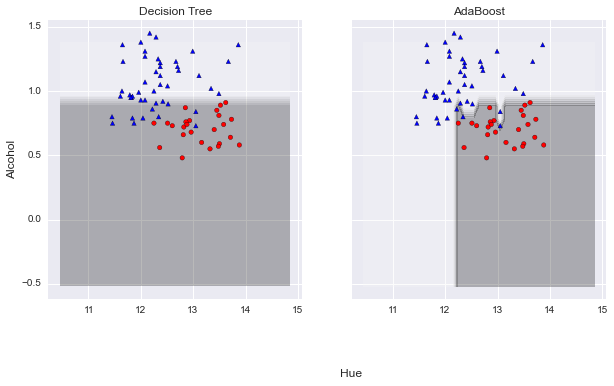

In [281]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set();
f,axarr = plt.subplots(1,2,sharex='col',sharey='row',figsize=(10,5))
for idx,clf,tt in zip([0,1],[tree,ada],['Decision Tree','AdaBoost']):
    clf.fit(X_train,y_train)
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(X_train[y_train==0, 0],X_train[y_train==0, 1],c='blue',marker='^')
    axarr[idx].scatter(X_train[y_train==1, 0],X_train[y_train==1, 1],c='red',marker='o')
    axarr[idx].set_title(tt)
axarr[0].set_ylabel('Alcohol', fontsize=12)
plt.text(10.2, -1.2,s='Hue',ha='center',va='center', fontsize=12)

In [282]:
## k-means clustering (CH11 in Python for ML)
from sklearn.datasets import make_blobs

In [283]:
X,y = make_blobs(n_samples=150,n_features=2,centers=3,cluster_std=0.5,shuffle=True,random_state=0)

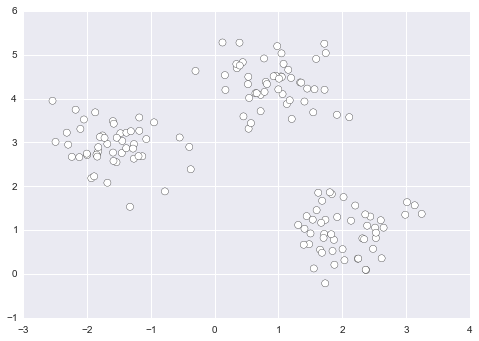

In [284]:
plt.scatter(X[:,0],X[:,1],c='white',marker='o',s=50)

In [285]:
from sklearn.cluster import KMeans

In [286]:
km = KMeans(n_clusters=3,init='random',n_init=10,max_iter=300,tol=1e-4,random_state=0)

In [287]:
y_km = km.fit_predict(X)

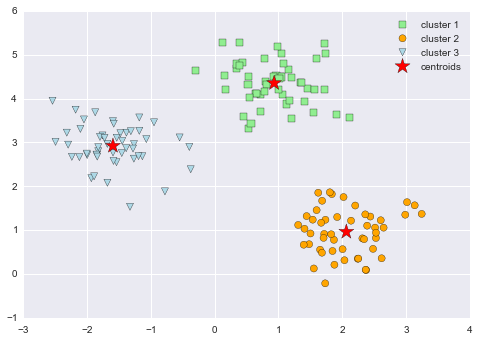

In [288]:
plt.scatter(X[y_km==0,0], X[y_km ==0,1],s=50,c='lightgreen',marker='s',label='cluster 1')
plt.scatter(X[y_km ==1,0],X[y_km ==1,1],s=50,c='orange',marker='o',label='cluster 2')
plt.scatter(X[y_km ==2,0],X[y_km ==2,1],s=50,c='lightblue',marker='v',label='cluster 3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,marker='*',c='red',label='centroids')
plt.legend()

In [289]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 72.48


In [290]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

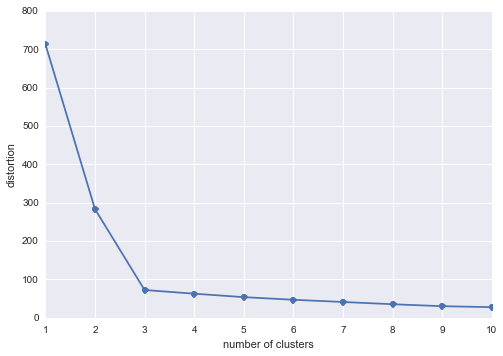

In [291]:
plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('number of clusters')
plt.ylabel('distortion')

In [292]:
## silhouette plots
km = KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,tol=1e-04,random_state=0)
y_km = km.fit_predict(X)

In [294]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,y_km,metric='euclidean')

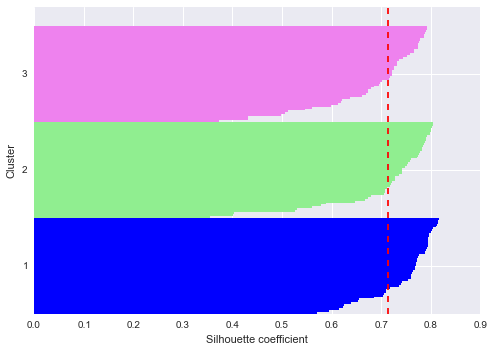

In [295]:
y_ax_lower, y_ax_upper = 0, 0
yticks = []
colors=['blue','lightgreen','violet']
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = colors[i]
    plt.barh(range(y_ax_lower, y_ax_upper),c_silhouette_vals,height=1.0,edgecolor='none',color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color="red",linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

Well separated clusters are closer to 1

# Agglomerative Hierarchical Clustering

In [296]:
import pandas as pd
import numpy as np

In [297]:
np.random.seed(123)
variables = ['X','Y','Z']
labels = ['ID_0','ID_1','ID_2','ID_3','ID_4']
X = np.random.random_sample([5,3])*10.
df = pd.DataFrame(X,columns=variables,index=labels)

In [298]:
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


calculate distance matrix

In [299]:
from scipy.spatial.distance import pdist,squareform

In [300]:
row_dist = pd.DataFrame(squareform(pdist(df,metric='euclidean')),columns=labels,index=labels)

In [301]:
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [302]:
from scipy.cluster.hierarchy import linkage

In [303]:
row_clusters=linkage(pdist(df,metric='euclidean'),method='complete')

In [304]:
pd.DataFrame(row_clusters,columns=['row1','row2','distance','no. of items in cluster'],\
              index=['cluster %d' % (i+1) for i in range(row_clusters.shape[0])])

,row1,row2,distance,no. of items in cluster
cluster 1,0,4,3.835396,2
cluster 2,1,2,4.347073,2
cluster 3,3,5,5.899885,3
cluster 4,6,7,8.316594,5


# Building Good Training Sets
## Ch4 Python for ML

In [305]:
import pandas as pd
from io import StringIO

In [306]:
csv_data = ''' A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
0.0,11.0,12.0,
'''

In [307]:
csv_data = unicode(csv_data)

In [308]:
df = pd.read_csv(StringIO(csv_data))

In [309]:
df

,A,B,C,D
0,1,2,3,4
1,5,6,NaN,8
2,0,11,12,NaN


In [310]:
df.isnull().sum()

 A    0
B     0
C     1
D     1
dtype: int64

In [311]:
## Access numpy values of dataframe
df.values

array([[  1.,   2.,   3.,   4.],
       [  5.,   6.,  nan,   8.],
       [  0.,  11.,  12.,  nan]])

In [312]:
df.dropna()

,A,B,C,D
0,1,2,3,4


In [313]:
df.dropna(axis=1)

,A,B
0,1,2
1,5,6
2,0,11


In [314]:
# only drop rows where all columns are NaN
df.dropna(how='all')

,A,B,C,D
0,1,2,3,4
1,5,6,NaN,8
2,0,11,12,NaN


In [315]:
# drop rows that have at don't have a minimum number (thresh) 
# of non-NaNs
df.dropna(thresh=4)

,A,B,C,D
0,1,2,3,4


In [316]:
# only drop rows where NaN appears in specific column
df.dropna(subset=['C'])

,A,B,C,D
0,1,2,3,4
2,0,11,12,NaN


## Imputing values

In [317]:
from sklearn.preprocessing import Imputer

In [318]:
imr = Imputer(missing_values='NaN',strategy='mean',axis=0)

In [319]:
imr = imr.fit(df)

In [320]:
imputed_data = imr.transform(df.values)

In [321]:
imputed_data

array([[  1. ,   2. ,   3. ,   4. ],
       [  5. ,   6. ,   7.5,   8. ],
       [  0. ,  11. ,  12. ,   6. ]])

In [322]:
df

,A,B,C,D
0,1,2,3,4
1,5,6,NaN,8
2,0,11,12,NaN


## Categorical data

In [323]:
import pandas as pd

In [324]:
df = pd.DataFrame([['green','M',10.1,'class1'],
                   ['red','L',13.5,'class2'],
                   ['blue','XL',15.3,'class1']])
df.columns = ['color','size','price','classlabel']

In [325]:
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [326]:
size_mapping = {'XL':3,'L':2,'M':1}

In [327]:
df['size'] = df['size'].map(size_mapping)

In [328]:
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [329]:
import numpy as np

In [330]:
class_mapping = {label:idx 
                 for idx,label in enumerate(np.unique(df['classlabel']))}

In [331]:
class_mapping

{'class1': 0, 'class2': 1}

In [332]:
## transform class labels into integers
df['classlabel'] = df['classlabel'].map(class_mapping)

In [333]:
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [334]:
inv_class_mapping = {v:k for k,v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)

In [335]:
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [336]:
## alternatively, use LabelEncoder
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()

In [337]:
df['classlabel'] = class_le.fit_transform(df.classlabel.values)

In [338]:
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


## one-hot encoding on nominal features

In [339]:
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [340]:
color_le = LabelEncoder()

In [341]:
df['color'] = color_le.fit_transform(df.color.values)
df

,color,size,price,classlabel
0,1,1,10.1,0
1,2,2,13.5,1
2,0,3,15.3,0


In [342]:
## now perform the one-hot encoding
from sklearn.preprocessing import OneHotEncoder

In [343]:
## one hot encoding applied to column [0]
ohe = OneHotEncoder(categorical_features=[0])

In [344]:
ohe.fit_transform(df[['color','size','price']].values).toarray()

array([[  0. ,   1. ,   0. ,   1. ,  10.1],
       [  0. ,   0. ,   1. ,   2. ,  13.5],
       [  1. ,   0. ,   0. ,   3. ,  15.3]])

In [345]:
ohe.fit_transform(df.ix[:,:-1].values).toarray()

array([[  0. ,   1. ,   0. ,   1. ,  10.1],
       [  0. ,   0. ,   1. ,   2. ,  13.5],
       [  1. ,   0. ,   0. ,   3. ,  15.3]])

In [346]:
## transform back to original string label
df['classlabel'] = class_le.inverse_transform(df.classlabel.values)

In [347]:
df

,color,size,price,classlabel
0,1,1,10.1,class1
1,2,2,13.5,class2
2,0,3,15.3,class1


In [348]:
## get_dummies will convert string cols to nominal features
## via one-hot encoding and leave all other features unchanged

df = pd.DataFrame([['green','M',10.1,'class1'],
                   ['red','L',13.5,'class2'],
                   ['blue','XL',15.3,'class1']])
df.columns = ['color','size','price','classlabel']
class_le = LabelEncoder()
df['size'] = class_le.fit_transform(df['size'].values)
df['classlabel'] = class_le.fit_transform(df['classlabel'].values)
df = pd.get_dummies(df[['price','size','color','classlabel']])
#df = pd.get_dummies(df)

In [349]:
df

,price,size,classlabel,color_blue,color_green,color_red
0,10.1,1,0,0,1,0
1,13.5,0,1,0,0,1
2,15.3,2,0,1,0,0


## Partition dataset into train/test

In [350]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)

In [351]:
df_wine.columns = ['Class label','Alcohol',
                    'Malic Acid','Ash',
                  'Alcalinity of Ash','Magnesium',
                  'Total phenols','Flavanoids',
                  'Nonflavanoid phenols','Proanthocyanins',
                  'Color intensity','Hue',
                  'OD280/OD315 of diluted wines',
                  'Proline']

In [352]:
df_wine.head(10)

,Class label,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [353]:
print 'Class labels:',np.unique(df_wine['Class label'])

Class labels: [1 2 3]


In [354]:
from sklearn.cross_validation import train_test_split

In [355]:
X,y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values

In [356]:
X_train,X_test,y_train,y_test = \
    train_test_split(X,y,test_size=0.3,random_state=0)

## Bringing features on same scale

In [357]:
## min-max scaling (normalization)
from sklearn.preprocessing import MinMaxScaler

In [358]:
mms = MinMaxScaler()

In [359]:
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [360]:
## standardization
from sklearn.preprocessing import StandardScaler

In [361]:
stdsc = StandardScaler()

In [362]:
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [363]:
from sklearn.linear_model import LogisticRegression

In [364]:
LogisticRegression(penalty='l1')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [365]:
lr = LogisticRegression(penalty='l1',C=0.1)

In [366]:
lr.fit(X_train_std,y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [367]:
print 'Training accuracy:', lr.score(X_train_std,y_train)

Training accuracy: 0.983870967742


In [368]:
print 'Testing accuracy', lr.score(X_test_std,y_test)

Testing accuracy 0.981481481481


In [369]:
## intercept for one-vs-all
## i.e. 1 vs 2 and 3, 2 vs 1 and 3, 3 vs 1 and 2
lr.intercept_

array([-0.38381023, -0.15807972, -0.70037491])

In [370]:
## weight array
lr.coef_

array([[ 0.27999949,  0.        ,  0.        , -0.02796199,  0.        ,
         0.        ,  0.70997947,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.2367318 ],
       [-0.64400404, -0.06877414, -0.05721235,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.92685038,
         0.06019908,  0.        , -0.3710242 ],
       [ 0.        ,  0.06135885,  0.        ,  0.        ,  0.        ,
         0.        , -0.63729612,  0.        ,  0.        ,  0.49868493,
        -0.35795113, -0.57019934,  0.        ]])

In [371]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

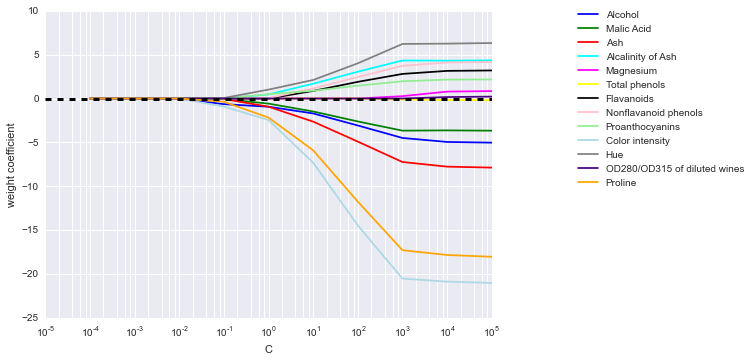

In [372]:
fig = plt.figure()
ax  = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan',
           'magenta', 'yellow', 'black',
           'pink', 'lightgreen', 'lightblue',
           'gray', 'indigo', 'orange']
weights, params = [],[]
for c in np.arange(-4,6):
    lr = LogisticRegression(penalty='l1',C=10**c,random_state=0)
    lr.fit(X_train_std,y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
    label=df_wine.columns[column+1], color=color)

plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
           bbox_to_anchor=(1.38, 1.03),
           ncol=1, fancybox=True)

## Sequential feature selection

In [373]:
## Sequential backward search
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

In [374]:
from SBS import SBS

In [375]:
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
import matplotlib.pyplot as plt
knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn,k_features=1)
sbs.fit(X_train_std,y_train)

<SBS.SBS instance at 0xa4516a4c>

In [376]:
k_feat = [len(k) for k in sbs.subsets_]

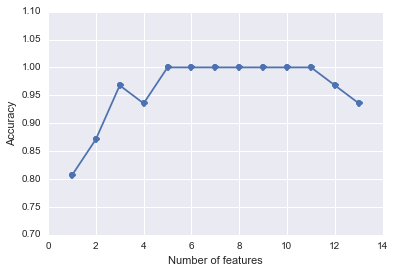

In [377]:
plt.plot(k_feat,sbs.scores_,marker='o')
plt.ylim([0.7,1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')

In [378]:
## Show features that yielded highest accuracy
k5 = list(sbs.subsets_[8])
print(df_wine.columns[1:][k5])

Index([u'Alcohol', u'Malic Acid', u'Alcalinity of Ash', u'Hue', u'Proline'], dtype='object')


In [379]:
knn.fit(X_train_std,y_train)
print 'Training accuracy:', knn.score(X_train_std,y_train)

Training accuracy: 0.983870967742


In [380]:
print 'Testing accuracy', knn.score(X_test_std,y_test)

Testing accuracy 0.944444444444


In [381]:
knn.fit(X_train_std[:,k5],y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [382]:
print 'Training accuracy:',knn.score(X_train_std[:,k5],y_train)

Training accuracy: 0.959677419355


In [383]:
print 'Test accuracy:',knn.score(X_test_std[:,k5],y_test)

Test accuracy: 0.962962962963


## Feature importance with random forests

In [384]:
from sklearn.ensemble import RandomForestClassifier

In [385]:
feat_labels = df_wine.columns[1:]

In [386]:
forest = RandomForestClassifier(n_estimators=10000,
                                random_state=0,n_jobs=-1)

In [387]:
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [388]:
importances = forest.feature_importances_

In [389]:
indices = np.argsort(importances)[::-1]

In [390]:
for f in range(X_train.shape[1]):
    print '%2d %-*s %f' % (f+1,30,feat_labels[f],importances[indices[f]]) 

 1 Alcohol                        0.182169
 2 Malic Acid                     0.158680
 3 Ash                            0.151389
 4 Alcalinity of Ash              0.132085
 5 Magnesium                      0.106648
 6 Total phenols                  0.078086
 7 Flavanoids                     0.060561
 8 Nonflavanoid phenols           0.032131
 9 Proanthocyanins                0.025390
10 Color intensity                0.022380
11 Hue                            0.022035
12 OD280/OD315 of diluted wines   0.014670
13 Proline                        0.013774


(-1, 13)

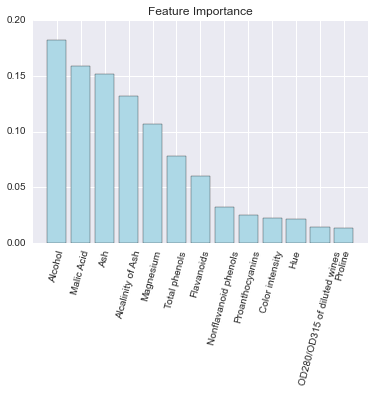

In [391]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        color='lightblue',
        align='center')
plt.xticks(range(X_train.shape[1]),feat_labels,rotation=75)
plt.xlim([-1,X_train.shape[1]])

In [392]:
## Set threshold for feature importance
X_selected = forest.transform(X_train,threshold=0.15)
X_selected.shape

/usr/local/lib/python2.7/dist-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


(124, 3)

In [393]:
from sklearn.feature_selection import SelectFromModel

In [394]:
sfm = SelectFromModel(forest,threshold=0.15)

In [395]:
sfm.fit(X_train,y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
        prefit=False, threshold=0.15)

In [396]:
n_features = sfm.transform(X_train).shape[1]

In [397]:
n_features

3

In [398]:
X_selected = sfm.transform(X_train)

In [399]:
X_selected.shape

(124, 3)

# Dimensionality Reduction
## Chapter 5 Python for ML

## PCA

In [455]:
import pandas as pd

In [456]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)

### Split into train/test and standardize to unit variance

In [457]:
from sklearn.cross_validation import train_test_split

In [458]:
from sklearn.preprocessing import StandardScaler

In [459]:
X,y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values

In [460]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [461]:
sc = StandardScaler()

In [462]:
X_train_std = sc.fit_transform(X_train)

In [463]:
X_test_std = sc.fit_transform(X_test)

### Construct covariance matrix

In [464]:
import numpy as np

In [465]:
cov_mat = np.cov(X_train_std.T)

In [466]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [467]:
print '\nEigenvalues \n%s' % eigen_vals


Eigenvalues 
[ 4.8923  2.4664  1.4281  1.0123  0.8491  0.6018  0.5225  0.0841  0.3305
  0.296   0.1683  0.2143  0.24  ]


### Plot variance explained ratio of eigenvalues

In [468]:
tot = sum(eigen_vals)

In [469]:
var_exp = [(i/tot) for i in sorted(eigen_vals,reverse=True)]

In [470]:
cum_var_exp = np.cumsum(var_exp)

In [471]:
%matplotlib inline
import matplotlib.pyplot as plt

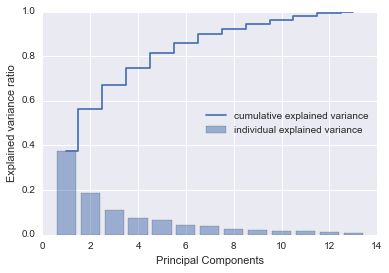

In [472]:
plt.bar(range(1,14), var_exp, alpha=0.5, align='center',
       label = 'individual explained variance')
plt.step(range(1,14),cum_var_exp,where='mid',
        label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')

## Feature Transformation

In [473]:
eigen_pairs = [(np.abs(eigen_vals[i]),eigen_vecs[:,i])
              for i in range(len(eigen_vals))]

In [474]:
eigen_pairs.sort(reverse=True)

In [475]:
w = np.hstack((eigen_pairs[0][1][:,np.newaxis],
               eigen_pairs[1][1][:,np.newaxis]))

In [476]:
## Projection matrix from top 2 eigenvectors
print 'Matrix W:\n',w

Matrix W:
[[ 0.1467  0.5042]
 [-0.2422  0.2422]
 [-0.0299  0.287 ]
 [-0.2552 -0.0647]
 [ 0.1208  0.23  ]
 [ 0.3893  0.0936]
 [ 0.4233  0.0109]
 [-0.3063  0.0187]
 [ 0.3057  0.0304]
 [-0.0987  0.5453]
 [ 0.3003 -0.2792]
 [ 0.3682 -0.1744]
 [ 0.2926  0.3632]]


In [477]:
X_train_std[0].dot(w)

array([ 2.5989,  0.0048])

In [478]:
X_train_pca = X_train_std.dot(w)

In [479]:
X_train_pca.shape

(124, 2)

In [480]:
colors = ['r','b','g']
markers = ['s','x','o']

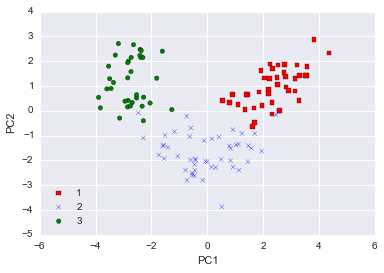

In [481]:
for l,c,m in zip(np.unique(y_train),colors,markers):
    plt.scatter(X_train_pca[y_train==l,0],
                X_train_pca[y_train==l,1],c=c,label=l,marker=m)
    
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')

## PCA with Logistic Regression

In [482]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns; sns.set()

In [483]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)

In [484]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [485]:
pca = PCA(n_components=2)

In [486]:
lr = LogisticRegression()

In [487]:
X_train_pca = pca.fit_transform(X_train_std)

In [488]:
X_test_pca = pca.transform(X_test_std)

In [489]:
lr.fit(X_train_pca,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

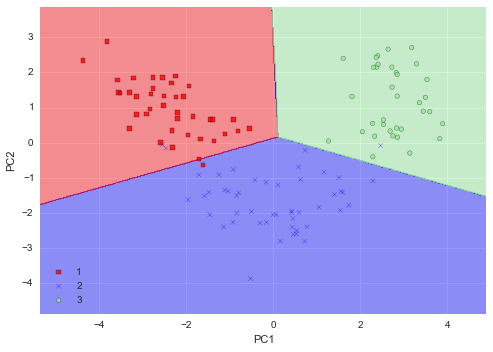

In [490]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')

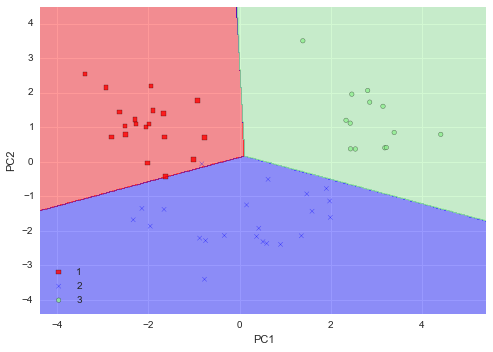

In [491]:
plot_decision_regions(X_test_pca,y_test,classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')

### Explained variance ratio

In [492]:
# return all principle components in sorted order
pca = PCA(n_components=None)

In [493]:
X_train_pca = pca.fit_transform(X_train_std)

In [494]:
pca.explained_variance_ratio_

array([ 0.3733,  0.1882,  0.109 ,  0.0772,  0.0648,  0.0459,  0.0399,
        0.0252,  0.0226,  0.0183,  0.0164,  0.0128,  0.0064])

## Linear Discriminant Analysis

In [495]:
np.set_printoptions(precision=4)

In [496]:
mean_vecs = []

In [497]:
# Print the mean vectors for each class i
for label in range(1,4):
    mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))
    print 'MV %s: %s\n' %(label,mean_vecs[label-1])

MV 1: [ 0.9259 -0.3091  0.2592 -0.7989  0.3039  0.9608  1.0515 -0.6306  0.5354
  0.2209  0.4855  0.798   1.2017]

MV 2: [-0.8727 -0.3854 -0.4437  0.2481 -0.2409 -0.1059  0.0187 -0.0164  0.1095
 -0.8796  0.4392  0.2776 -0.7016]

MV 3: [ 0.1637  0.8929  0.3249  0.5658 -0.01   -0.9499 -1.228   0.7436 -0.7652
  0.979  -1.1698 -1.3007 -0.3912]



In [498]:
# Compute within-class scatter matrix
d = 13 # number of features
S_W = np.zeros((d,d))

In [499]:
for label,mv in zip(range(1,4),mean_vecs):
    class_scatter = np.zeros((d,d))
    for row in X[y==label]:
        row,mv = row.reshape(d,1), mv.reshape(d,1)
        class_scatter += (row-mv).dot((row-mv).T)
    S_W += class_scatter

In [500]:
print 'Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1])

Within-class scatter matrix: 13x13


In [503]:
print 'Class label distribution: %s' % np.bincount(np.intp(y_train))[1:]

Class label distribution: [40 49 35]


In [505]:
d=13 ## number of features

In [506]:
S_W = np.zeros((d,d))

In [507]:
for label,mv in zip(range(1,4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train==label].T)
    S_W += class_scatter

In [508]:
print 'Scaled within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1])

Scaled within-class scatter matrix: 13x13


In [509]:
mean_overall = np.mean(X_train_std, axis=0)

In [523]:
d=13 ## number of features

In [524]:
S_B = np.zeros((d,d))

In [525]:
for i,mean_vec in enumerate(mean_vecs):
    n = X[y==i,:].shape[0]
    mean_vec = mean_vec.reshape(d,1)
    mean_overall = mean_overall.reshape(d,1)
    S_B += n*(mean_vec-mean_overall).dot((mean_vec-mean_overall).T)

In [526]:
print 'Between-class scatter matrix: %sx%s' % (S_B.shape[0],S_B.shape[1])

Between-class scatter matrix: 13x13


In [535]:
eigen_vals, eigen_vecs = \
    np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [536]:
## Sort eigenvalues in descending order
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

In [537]:
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

In [538]:
print 'Eigenvalues in descending order:\n'
for eigen_val in eigen_pairs:
    print eigen_val[0]

Eigenvalues in descending order:

561.934046337
99.3043103461
7.18749912814e-14
4.64025750726e-14
2.057257672e-14
2.057257672e-14
1.99591477387e-14
1.46791563119e-14
1.46791563119e-14
1.2128738458e-14
7.0121122789e-15
2.24366052121e-15
2.24366052121e-15


In [539]:
tot = sum(eigen_vals.real)

In [540]:
discr = [(i/tot) for i in sorted(eigen_vals.real, reverse=True)]

In [541]:
cum_discr = np.cumsum(discr)

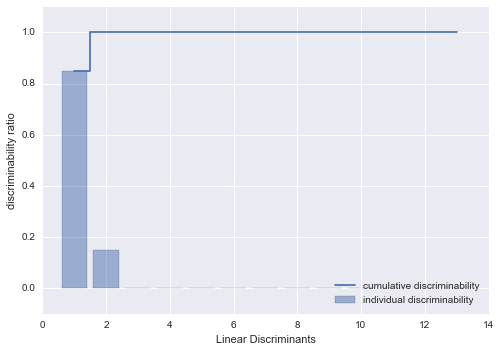

In [547]:
plt.bar(range(1,14),discr,alpha=0.5,align='center',label='individual discriminability')
plt.step(range(1,14),cum_discr,where='mid',label='cumulative discriminability')
plt.ylabel('discriminability ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1,1.1])
plt.legend(loc='lower right')

In [549]:
w = np.hstack((eigen_pairs[0][1][:,np.newaxis].real,
             eigen_pairs[1][1][:,np.newaxis].real))

In [550]:
print 'Transformation Matrix W:\n', w

Transformation Matrix W:
[[-0.029   0.3351]
 [-0.0925  0.1495]
 [-0.0731  0.3106]
 [-0.106  -0.3434]
 [ 0.0069 -0.009 ]
 [-0.2226 -0.1547]
 [ 0.8068  0.3084]
 [ 0.0969 -0.0067]
 [-0.0415 -0.1915]
 [-0.2519  0.1131]
 [ 0.1229 -0.1446]
 [ 0.3916  0.1662]
 [ 0.1748  0.6586]]


In [551]:
X_train_lda = X_train_std.dot(w)

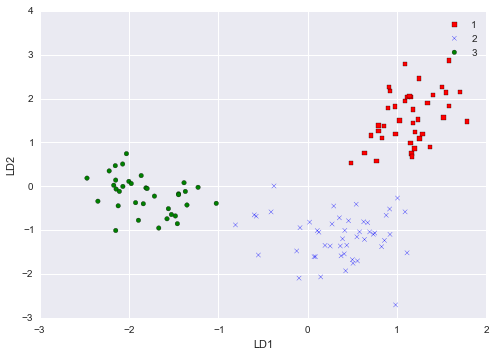

In [553]:
colors = ['r','b','g']
markers = ['s','x','o']
for l,c,m, in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==l, 0], X_train_lda[y_train==l, 1], c=c, label=l, marker=m)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc='upper right')

In [556]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [557]:
lda = LDA(n_components=2)

In [558]:
X_train_lda = lda.fit_transform(X_train_std, y_train)

In [559]:
lr = LogisticRegression()

In [560]:
lr = lr.fit(X_train_lda,y_train)

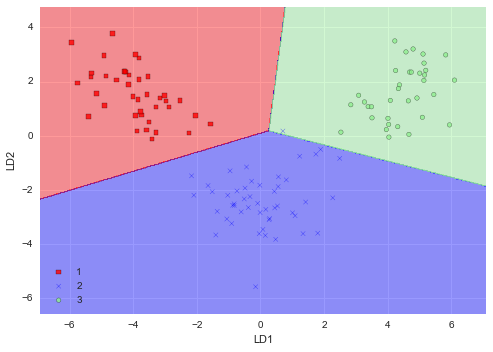

In [562]:
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc='lower left')

In [563]:
X_test_lda = lda.transform(X_test_std)

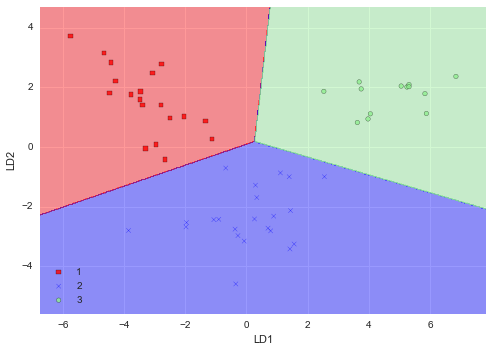

In [565]:
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc='lower left')

## Kernel PCA
### Dimensionality reduction for non-linearly separable classes

In [143]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np
def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA implementation.
    Parameters
    ------------
    X: {NumPy ndarray}, shape = [n_samples, n_features]
    gamma: float
    Tuning parameter of the RBF kernel
    n_components: int
    Number of principal components to return
    Returns
    ------------
    X_pc: {NumPy ndarray}, shape = [n_samples, k_features]
    Projected dataset
    """
    # Calculate the pairwise squared Euclidean dist
    # in the MxN dim dataset
    sq_dists = pdist(X,'sqeuclidean')
    
    # Convert pairwise distances into a square matrix
    mat_sq_dists = squareform(sq_dists)
    
    # Compute symmetric kernel matrix
    K = exp(-gamma*mat_sq_dists)
    
    # Center kernel matrix K
    N = K.shape[0]
    one_n = np.ones((N,N))/N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    # Obtain eigenpairs from centered kernel matrix
    # Function numpy.eigh returns them in sorted order
    eigvals, eigvecs = eigh(K)
    
    # Collect top k eigenvectors (projected samples)
    X_pc = np.column_stack((eigvecs[:,-i] for i in range(1,n_components+1)))
    
    return X_pc

In [144]:
from sklearn.datasets import make_moons
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [145]:
X,y = make_moons(n_samples=100, random_state=123)

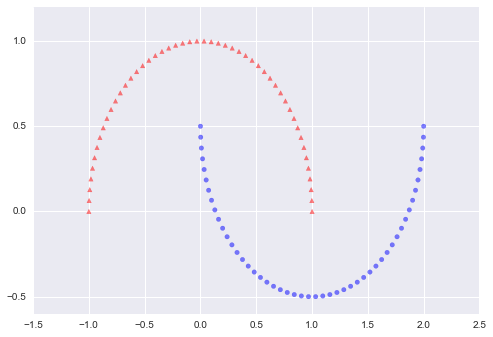

In [146]:
plt.scatter(X[y==0,0],X[y==0,1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1,0],X[y==1,1], color='blue', marker='o', alpha=0.5)

In [147]:
from sklearn.decomposition import PCA

In [148]:
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

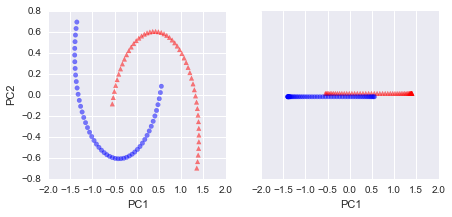

In [149]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[y==0,0],X_spca[y==0,1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1,0],X_spca[y==1,1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((50,1))+0.02,color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((50,1))-0.02,color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

In [150]:
from matplotlib.ticker import FormatStrFormatter

In [151]:
X_kpca = rbf_kernel_pca(X,gamma=15,n_components=2)

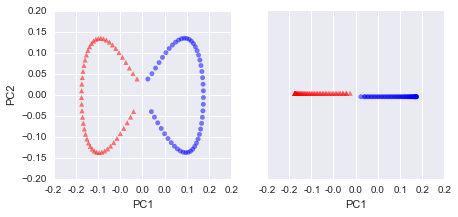

In [152]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(7,3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02,color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02,color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
ax[0].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))


In [153]:
from sklearn.datasets import make_circles

In [154]:
X,y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

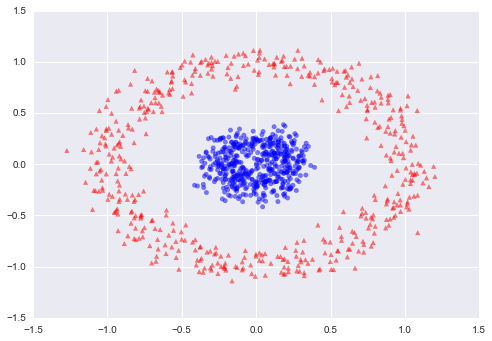

In [155]:
plt.scatter(X[y==0,0], X[y==0,1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1,0], X[y==1,1], color='blue', marker='o', alpha=0.5)

In [156]:
scikit_pca = PCA(n_components=2)

In [157]:
X_spca = scikit_pca.fit_transform(X)

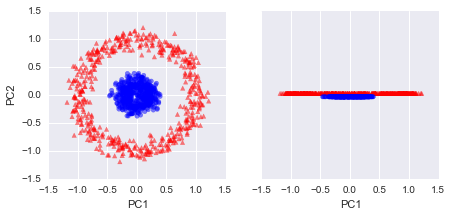

In [158]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(7,3))
ax[0].scatter(X_spca[y==0,0],X_spca[y==0,1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1,0],X_spca[y==1,1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((500,1))+0.02,color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((500,1))-0.02,color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')


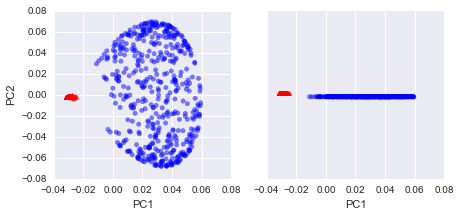

In [159]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(7,3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((500,1))+0.02,
color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((500,1))-0.02,color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

### Projecting new data points that were not part of original training set.

In [160]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np
def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA implementation.
    Parameters
    ------------
    X: {NumPy ndarray}, shape = [n_samples, n_features]
    gamma: float
    Tuning parameter of the RBF kernel
    n_components: int
    Number of principal components to return
    Returns
    ------------
    X_pc: {NumPy ndarray}, shape = [n_samples, k_features]
    Projected dataset
    """
    # Calculate the pairwise squared Euclidean dist
    # in the MxN dim dataset
    sq_dists = pdist(X,'sqeuclidean')
    
    # Convert pairwise distances into a square matrix
    mat_sq_dists = squareform(sq_dists)
    
    # Compute symmetric kernel matrix
    K = exp(-gamma*mat_sq_dists)
    
    # Center kernel matrix K
    N = K.shape[0]
    one_n = np.ones((N,N))/N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    # Obtain eigenpairs from centered kernel matrix
    # Function numpy.eigh returns them in sorted order
    eigvals, eigvecs = eigh(K)
    
    # Collect top k eigenvectors (projected samples)
    alphas = np.column_stack((eigvecs[:,-i] for i in range(1,n_components+1)))
    
    # Collect corresponding eigenvalues
    lambdas = [eigvals[-i] for i in range(1,n_components+1)]
    
    return alphas,lambdas

In [161]:
X,y = make_moons(n_samples=100, random_state=123)

In [174]:
alphas,lambdas = rbf_kernel_pca(X,gamma=15,n_components=1)

(100, 1)

In [163]:
# Project new point (assume 26th points) onto subspace
x_new = X[25]
x_new

array([ 1.8713187 ,  0.00928245])

In [164]:
x_proj = alphas[25]

In [165]:
x_proj

array([ 0.07877284])

In [170]:
def project_x(x_new,X,gamma,alphas,lambdas):
    pair_dist = np.array([np.sum((x_new-row)**2) for row in X])
    k = np.exp(-gamma*pair_dist)
    return k.dot(alphas/lambdas)

In [171]:
## reproduce original projection
x_reproj = project_x(x_new,X,gamma=15,alphas=alphas, lambdas=lambdas)

In [172]:
x_reproj

array([ 0.07877284])

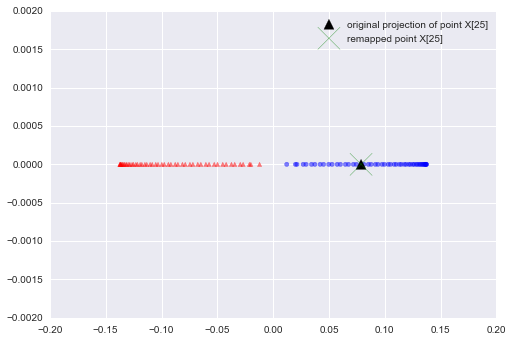

In [173]:
plt.scatter(alphas[y==0, 0], np.zeros((50)),color='red', marker='^',alpha=0.5)
plt.scatter(alphas[y==1, 0], np.zeros((50)),color='blue', marker='o', alpha=0.5)
plt.scatter(x_proj, 0, color='black',label='original projection of point X[25]',marker='^', s=100)
plt.scatter(x_reproj, 0, color='green',label='remapped point X[25]',marker='x', s=500)
plt.legend(scatterpoints=1)

In [175]:
from sklearn.decomposition import KernelPCA

In [176]:
X,y = make_moons(n_samples=100,random_state=123)

In [177]:
scikit_kpca = KernelPCA(n_components=2,kernel='rbf',gamma=15)

In [178]:
X_skernpca = scikit_kpca.fit_transform(X)

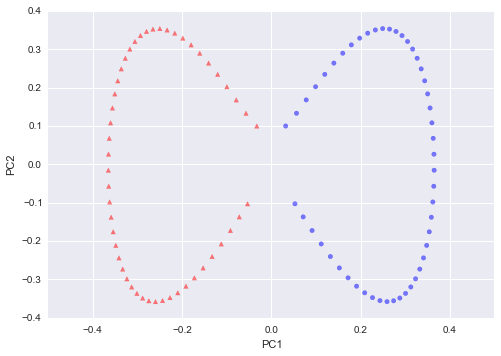

In [180]:
plt.scatter(X_skernpca[y==0,0], X_skernpca[y==0,1], color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y==1,0], X_skernpca[y==1,1], color='blue', marker='o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')